<a href="https://www.kaggle.com/code/sritata/ipl-2023-analytics?scriptVersionId=138025409" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Loading and reading the data

  - Downloaded data is loaded into kernel using pandas.

In [ ]:
match_df = pd.read_csv('/kaggle/input/indian-premier-league-cricket-2023/matches.csv')
ball_df = pd.read_csv('/kaggle/input/indian-premier-league-cricket-2023/deliveries.csv')

## Exploring each match data in IPL 2023


In [ ]:
match_df.head(5)

In [ ]:
match_df.info()

In [ ]:
match_df.columns.values.tolist()

`winner_wickets` and `winner_runs`  tells about the margin by which a team won the match. If `winner_wickets` have NaN values, it means team which bat 1st won the match, same with `winner_runs`.

In [ ]:
match_df.team1.unique() 

In [ ]:
match_df.match_number.nunique()

In [ ]:
match_df.isna().sum()

It's quiet obivous that `winner_runs` and `winner_wickets` contain missing values. Beacause, a team can win match either by margin of runs or wickets. As not all matches won by margin of wickets(runs), it can contain missing values.

Let's check why there is a missing value for `player_of_match`

In [ ]:
match_df[match_df.player_of_match.isna()]

It's the only match in IPL 2023 which was delayed due to rain. So, there is a meaning in having a missing value in `player_of_match`.

Match data is very clean. So, we can play with this data.

## Exploring the ball by ball data of each match in IPL 2023.

In [ ]:
ball_df.head(5)

In [ ]:
ball_df.info()

Number of rows in this data resembles number of balls bowled in IPL 2023. Number of rows are `17863` means `17863` balls are bowled.

In [ ]:
ball_df.innings.value_counts()

Let's check why number of balls balled in 1st innings are more than 74*120(=8880 i.e,. number of balls bowled in 1st innings)

In [ ]:
ball_df[ball_df.innings == 1].wides.value_counts()

In [ ]:
ball_df[ball_df.innings == 1].agg({'wides':'count','noballs':'count'})

In [ ]:
ball_df.groupby(['match_id','innings']).agg({'ball':'count','wides':'count','noballs':'count'})

As there is no match_id in match_df. Let's add `match_id` from ball_df to match_df

In [ ]:
match_df['match_id'] = ball_df['match_id'].unique()

As `innings` have only two values. So, there are no super overs bowled in IPL 2023.

In [ ]:
match_df[match_df['match_id'] == 1359522]

In some matches, batting team may all out before 20 overs.

In [ ]:
ball_df.batting_team.unique()

In [ ]:
ball_df.bowling_team.unique()

In [ ]:
ball_df.match_id.nunique()

It means it contains information about all `74` matches happened in IPL 2023.

In [ ]:
ball_df.isna().sum()

In [ ]:
use_cols = ['match_id','season','start_date','venue','innings','ball','batting_team','bowling_team','striker','bowler','runs_off_bat','player_dismissed']

In [ ]:
ball_df.extras.value_counts(dropna = False)

In [ ]:
ball_df.wides.value_counts(dropna = False)

In [ ]:
ball_df.wicket_type.value_counts(dropna = False)

In [ ]:
ball_df[ball_df.wicket_type == 'hit wicket'][use_cols]

Adding match details to data

In [ ]:
short_names = {'Royal Challengers Bangalore':'RCB','Mumbai Indians':'MI',
          'Chennai Super Kings':'CSK','Kolkata Knight Riders':'KKR',
          'Gujarat Titans':'GT','Delhi Capitals':'DC',
          'Rajasthan Royals':'RR','Lucknow Super Giants':'LSG',
          'Sunrisers Hyderabad':'SRH','Punjab Kings':'PBKS'}

In [ ]:
def get_match(row):
  row['match'] = short_names.get(row['team1']) + ' vs ' + short_names.get(row['team2'])
  return row

In [ ]:
match_df = match_df.apply(get_match,axis = 1)

In [ ]:
match_df.match

In [ ]:
ball_df = pd.merge(ball_df,match_df[['match_id','match']],on = 'match_id',how = 'left')

# IPL 2023 Report

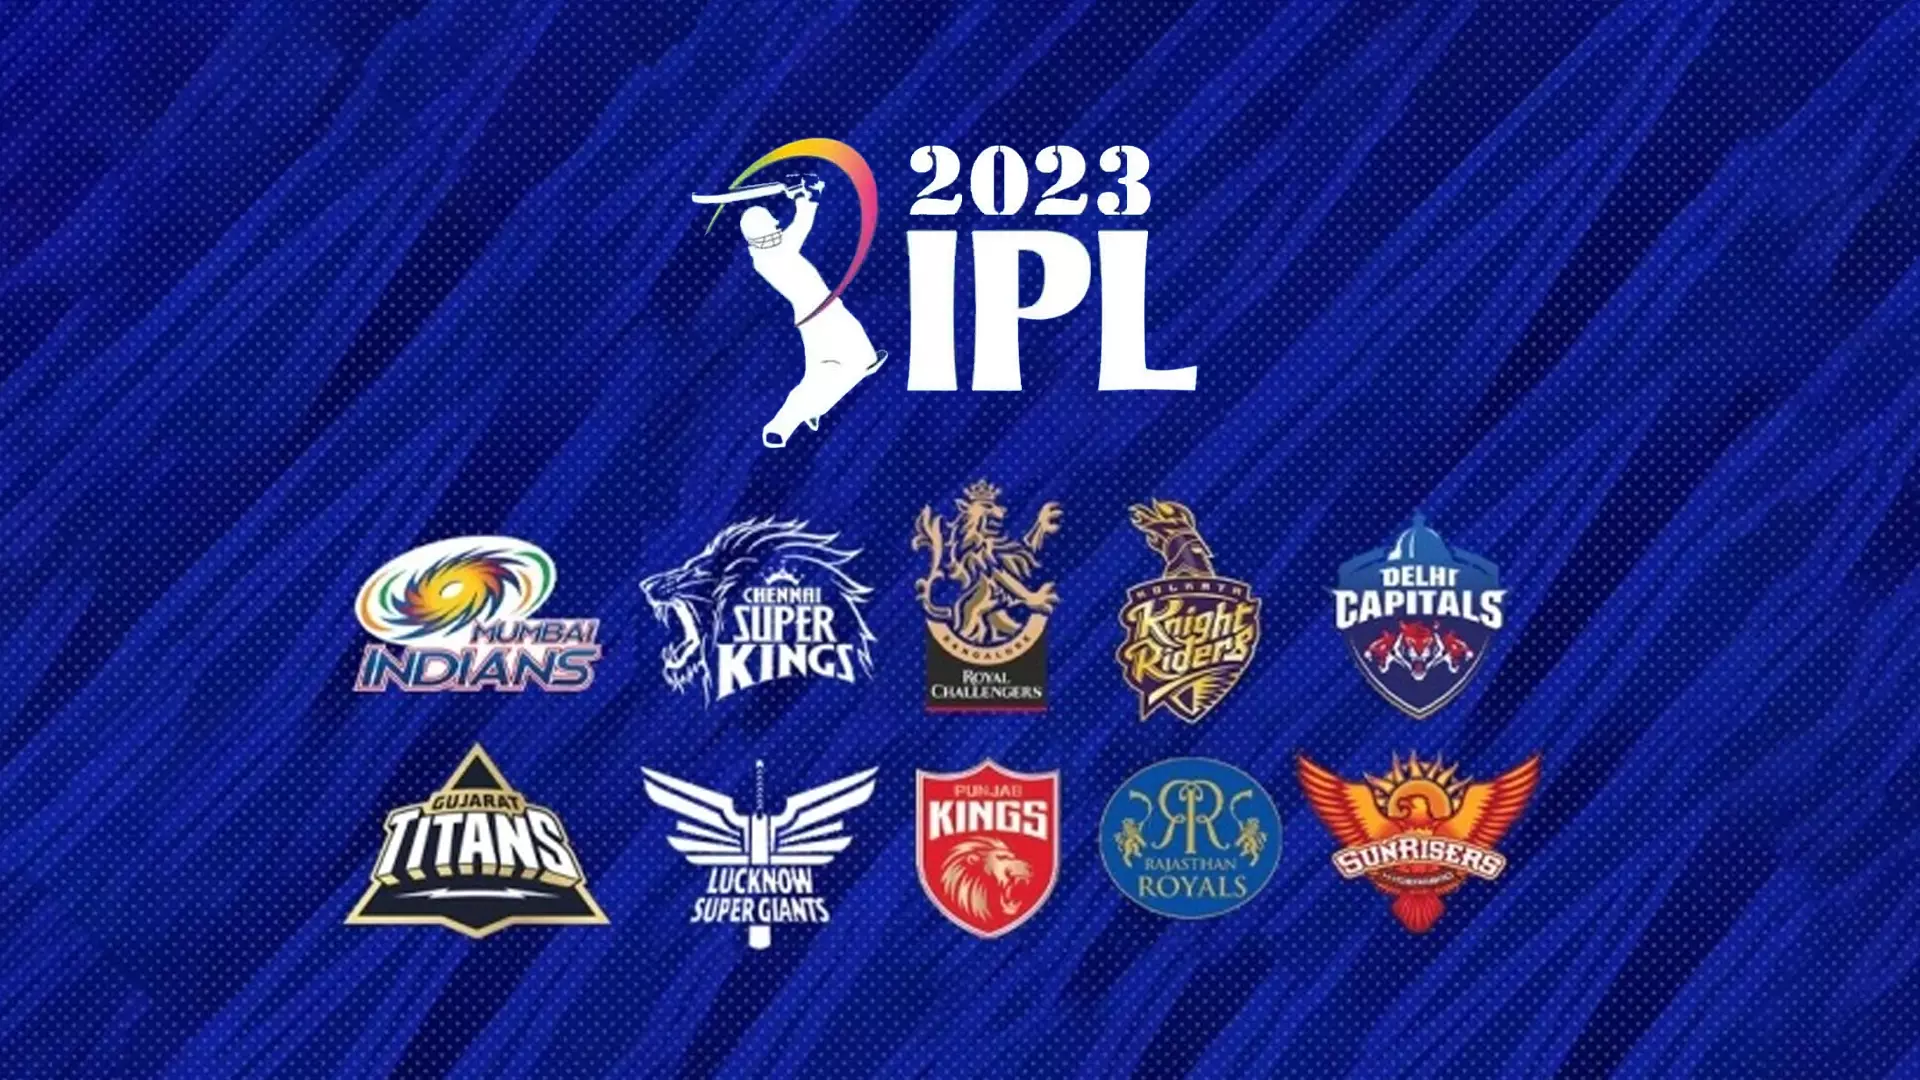

IPL stands for Indian Premier League. It is a professional Twenty20 cricket league in India that takes place annually. The league was founded by the Board of Control for Cricket in India (BCCI) in 2007 and the inaugural season took place in 2008. The IPL follows a franchise-based model, with teams representing various cities or states in India. The IPL is the most popular cricket league in the world and was ranked sixth by average attendance among all sports leagues in 2014. Each IPL season brings together a star-studded roster of players, both from India and abroad, showcasing their skills and competing fiercely for the ultimate glory. The league has become a platform for young Indian talent to shine, with several promising cricketers emerging from the IPL and earning recognition at the international level. IPL 2023 is the 16th season. This report presents you the entire, fully-packed statistics of IPL 2023 which will be fun and entertaining for audience and informative for franchises and players.

### Most runs

In [ ]:
#@title
t = ball_df.groupby(['striker','batting_team'],as_index = False).agg({'match_id':'nunique','runs_off_bat':'sum'}).sort_values(by = 'runs_off_bat',ascending = False).rename(columns = {'match_id':'matches','runs_off_bat':'runs','striker':'Batsmen','batting_team':'Team'})

t_10_bat = t.head(10).copy(deep = True).reset_index(drop = True)

t_10_bat.index += 1

t_10_bat

In [ ]:
#@title
def add_labels_onbars(x,y,size):
    for i in range(len(x)):
        plt.text(i,y[i],y[i],ha = 'center',fontsize = size)

Defining color palette for each team

Assigning colors to each team based on their jerseys.

In [ ]:
colors = {'Royal Challengers Bangalore':'#c7a902','Mumbai Indians':'blue',
          'Chennai Super Kings':'#ebe465','Kolkata Knight Riders':'purple',
          'Gujarat Titans':'#327ba8','Delhi Capitals':'#429ded',
          'Rajasthan Royals':'#d134e3','Lucknow Super Giants':'#3afce9',
          'Sunrisers Hyderabad':'orange','Punjab Kings':'red'}

In [ ]:
import plotly.express as px

fig = px.bar(t_10_bat,x = t_10_bat.index,y = 'runs',
             color = t_10_bat.Team.values,color_discrete_map = colors,text = t_10_bat.runs.values,
             title = 'Most runs')

fig.update_xaxes(title_text='Batsmen', tickvals=t_10_bat.index, ticktext=t_10_bat['Batsmen'].tolist())
fig.show()

### Most centuries

In [ ]:
#It shows runs scored by each batsmen in each match in IPL 2023.

runs_by_batter = ball_df[ball_df.wides.isna()].groupby(['striker','match_id','batting_team','match','innings'],as_index = False).agg({'runs_off_bat':'sum','ball':'count'}).sort_values(by = 'runs_off_bat',ascending = False).rename(columns = {'match_id':'matches','runs_off_bat':'runs','striker':'Batsmen','batting_team':'Team'})

runs_by_batter['SR'] = ((runs_by_batter['runs'] / runs_by_batter['ball']) * 100).round(2)

cent = runs_by_batter[runs_by_batter.runs >= 100].reset_index(drop = True).drop(columns = ['matches'])

cent.index += 1

cent

Totally `12` batsmen registered their centuries in IPL 2023.

In [ ]:
import plotly.express as px

fig = px.bar(cent,x = cent.index,y = 'runs',
             color = cent.Team.values,color_discrete_map = colors,text = cent.runs.values,
             title = 'Centuries in IPL 2023')

fig.update_xaxes(title_text='Batsmen', tickvals=cent.index, ticktext=cent['Batsmen'].tolist())
fig.show()

### More 50s

In [ ]:
half_cent = runs_by_batter[(runs_by_batter.runs < 100) & (runs_by_batter.runs >= 50)].reset_index(drop = True)

In [ ]:
half_cent = half_cent.groupby(['Batsmen','Team'],as_index = False).agg({'match':'count'}).sort_values(by = 'match',ascending = False).rename(columns = {'match':'50s'}).reset_index(drop = True)

half_cent.index += 1

half_cent.head(10)

In [ ]:
e = half_cent.head(10)

fig = px.bar(e,x = e.index,y = '50s',
             color = e.Team.values,color_discrete_map = colors,text = e['50s'].values,
             title = 'Most fifties')

fig.update_xaxes(title_text='Team', tickvals=e.index, ticktext=e['Batsmen'].tolist())
fig.show()

From the above graph, it is seen that three players from `Royal Challengers Bangalore` were in top 10.

### More 4s

In [ ]:
four = ball_df[(ball_df.runs_off_bat == 4)].groupby(['striker','batting_team'],as_index = False).agg({'runs_off_bat':'count'}).sort_values(by = 'runs_off_bat',ascending = False).reset_index(drop = True)

four_10 = four.head(10).copy(deep = True)

four_10.rename(columns = {'striker':'Batsmen',"batting_team":'Team','runs_off_bat':'fours'},inplace = True)

four_10.index += 1

four_10

In [ ]:
fig = px.bar(x = four_10.Batsmen.values,y = four_10.fours.values,
       text = four_10.fours.values,color = four_10.Team.values,color_discrete_map = colors,
       labels = {'x':'Batsmen','y':'Number of fours'},title = 'Most fours by a batsmen in IPL 2023')

fig.update_layout(xaxis = {'categoryorder':'total descending'})

### More 6s

In [ ]:
six = ball_df[(ball_df.runs_off_bat == 6)].groupby(['striker','batting_team'],as_index = False).agg({'runs_off_bat':'count'}).sort_values(by = 'runs_off_bat',ascending = False).reset_index(drop = True)

six_10 = six.head(10).copy(deep = True)

six_10.rename(columns = {'striker':'Batsmen',"batting_team":'Team','runs_off_bat':'sixes'},inplace = True)

six_10.index += 1

six_10

In [ ]:
fig = px.bar(x = six_10.Batsmen.values,y = six_10.sixes.values,
       text = six_10.sixes.values,color = six_10.Team.values,color_discrete_map = colors,
       labels = {'x':'Batsmen','y':'Number of sixes'},title = 'Most sixes by a batsmen')

fig.update_layout(xaxis = {'categoryorder':'total descending'})

### Best average

In [ ]:
dismissals = pd.DataFrame(ball_df.player_dismissed.value_counts().to_dict().items(),columns = ['Batsmen','no_of_times_dismissed'])

In [ ]:
bat_avg_df = ball_df.groupby(['striker','batting_team'],as_index = False).agg({'runs_off_bat':'sum','ball':'count'}).sort_values(by = 'runs_off_bat',ascending = False).rename(columns = {'striker':'Batsmen','batting_team':'Team'})

bat_avg_df = pd.merge(bat_avg_df,dismissals,on = 'Batsmen',how = 'left')

bat_avg_df['Avg'] = (bat_avg_df['runs_off_bat'] / bat_avg_df['no_of_times_dismissed']).round(2)

bat_avg_df = bat_avg_df.sort_values(by = 'Avg',ascending = False).reset_index(drop = True)

bat_avg_df.index += 1

bat_avg_df.head(10)[['Batsmen','Team','Avg']]

In [ ]:
bat_avg_10 = bat_avg_df.head(10)

fig = px.bar(x = bat_avg_10.Batsmen.values,y = bat_avg_10.Avg.values,
       text = bat_avg_10.Avg.values,color = bat_avg_10.Team.values,color_discrete_map = colors,
       labels = {'x':'Batsmen','y':'Average'})

fig.update_layout(xaxis = {'categoryorder':'total descending'})

`Batting Average` is the ratio of a player’s number of runs to the number of times they have been out.

### Best Average Strike Rate

In [ ]:
avg_sr_bat = runs_by_batter.groupby(['Batsmen','Team'],as_index = False).agg({'matches':'count','SR':'mean','runs':'sum','ball':'sum'})

avg_10 = avg_sr_bat[avg_sr_bat.ball >= 100].sort_values(by = 'SR',ascending = False).head(10).reset_index(drop = True)

avg_10.index += 1

avg_10

In [ ]:
fig = px.bar(x = avg_10.Batsmen.values,y = avg_10.SR.values,color = avg_10.Team.values,text = np.round(avg_10.SR.values,2),
       color_discrete_map = colors,labels = {'x':'Batsmen','y':'Strike Rate'},title = 'Batsmen who has highest strike rate(minimum 100 balls)')

fig.update_layout(xaxis={'categoryorder':'total descending'})

### Most duck 

In [ ]:
runs_by_batter = runs_by_batter.reset_index(drop = True)

In [ ]:
wkt_each = ball_df.groupby(['match_id','match'],as_index = False).agg({'player_dismissed':'unique'})

In [ ]:
def get_out_status(row):
  m = row['matches']
  if row['Batsmen'] in wkt_each[wkt_each['match_id'] == m]['player_dismissed'].values[0]:
    return 1 #Out
  else:
    return 0 #Not out
  #return wkt_each[wkt_each['match_id'] == m]['player_dismissed'].values[0]

In [ ]:
runs_by_batter['out'] = runs_by_batter.apply(get_out_status,axis = 1)

In [ ]:
duck = runs_by_batter[(runs_by_batter.runs == 0)].groupby(['Batsmen','Team'],as_index = False).agg({'out':'sum'}).sort_values(by = 'out',ascending = False).reset_index(drop = True)

duck.index += 1

duck.head(10)

In [ ]:
h = duck.head(10)

fig = px.bar(h,x = h.index,y = 'out',
             color = h.Team.values,color_discrete_map = colors,text = h['out'].values,
             title = 'Most ducks')

fig.update_xaxes(title_text='Batsmen', tickvals=h.index, ticktext=h['Batsmen'].tolist())
fig.show()

`JC Butler` from `Rajasthan Royals` has more ducks this season.

### Most wickets taken

In [ ]:
wkt = ball_df[~ball_df.wicket_type.isin(['retired hurt','retired out','run out',np.nan])].groupby(['bowler','bowling_team'],as_index = False).agg({'wicket_type':'count'}).sort_values(by = 'wicket_type',ascending = False).rename(columns = {'bowling_team':'team','wicket_type':'wickets'}).reset_index(drop = True)

wkt.index += 1

wkt_10 = wkt.head(10)

wkt_10

In [ ]:
fig = px.bar(x = wkt_10.bowler.values,y = wkt_10.wickets.values,color = wkt_10.team.values,
       title = 'Highesh wickets in IPL 2023',text = wkt_10.wickets.values,
       color_discrete_map = colors,
       labels = {'x':'bowler','y':'wickets'})


fig.update_layout(xaxis={'categoryorder':'total descending'})

### Most runs conceeded in an innings

In [ ]:
ball_df['bowler_runs'] = ball_df['runs_off_bat'] + ball_df['wides'].fillna(0) + ball_df['noballs'].fillna(0)

In [ ]:
run_con = ball_df.groupby(['bowler','innings','match_id','match','bowling_team'],as_index = False).agg({'bowler_runs':'sum'}).sort_values(by = 'bowler_runs',ascending = False).reset_index(drop = True)

run_con = pd.merge(run_con,ball_df[(ball_df.wides.isna()) & (ball_df.noballs.isna())].groupby(['bowler','innings','match_id','match','bowling_team'],as_index = False).agg({'ball':'count'}).sort_values(by = 'ball',ascending = False).reset_index(drop = True)[['match_id','bowler','ball']],on = ['match_id','bowler'],how = 'left')

run_con.index += 1

run_con.head(10).drop(columns =['match_id'])

`Yash Dayal` is the bowler who conceeded most runs in an innings in IPL 2023.

In [ ]:
g = run_con.head(10)

fig = px.bar(g,x = g.index,y = 'bowler_runs',
             color = g.bowling_team.values,color_discrete_map = colors,text = g['bowler_runs'].values,
             title = 'Most runs conceeded by a bowler in an innings',hover_data = ['match'])

fig.update_xaxes(title_text='Bowler', tickvals=e.index, ticktext=g['bowler'].tolist())
fig.show()

### Best economy rate by bowler in an innings

In [ ]:
run_con['overs'] = run_con['ball'] / 6

run_con['ER'] = (run_con['bowler_runs'] / run_con['overs']).round(2)

run_con[run_con.overs == 4].sort_values(by = 'ER').head(10).reset_index(drop = True).drop(columns = ['match_id']).rename(columns = {'bowler_runs':'runs'})

`Mohammed Shami` and `B Kumar` has best economy rate of `2.75` in an innings against the same team.

In [ ]:
h = run_con[run_con.overs == 4].sort_values(by = 'ER').head(10).reset_index(drop = True)

fig = px.bar(h,x = h.index,y = 'ER',
             color = h.bowling_team.values,color_discrete_map = colors,text = h['ER'].values,
             title = 'Best Econonmy Rate by a bowler in an innings',hover_data = ['match'])

fig.update_xaxes(title_text='bowler', tickvals=h.index, ticktext=h['bowler'].tolist())
fig.show()

### Most Maiden bowled

In [ ]:
ball_df['over'] = ball_df['ball'].astype(int)

In [ ]:
over_df = ball_df.groupby(['bowler','match_id','match','over','bowling_team'],as_index = False).agg({'bowler_runs':'sum','ball':'count'})

#contains information about each over bowled in IPL 2023

In [ ]:
maiden_df = over_df[(over_df['bowler_runs'] == 0) & (over_df.ball == 6)].groupby(['bowler','bowling_team'],as_index = False).agg({'match_id':'count'})

maiden_df.sort_values(by = 'match_id',ascending = False).rename(columns = {'match_id':'Maiden_overs'}).head(5).reset_index(drop = True)

`TA Boult` bowled `3` maiden overs which is most by a bowler in IPL 2023.

In [ ]:
i = maiden_df.sort_values(by = 'match_id',ascending = False).rename(columns = {'match_id':'Maiden_overs'}).head(5).reset_index(drop = True)

fig = px.bar(i,x = i.index,y = 'Maiden_overs',
             color = i.bowling_team.values,color_discrete_map = colors,text = i.Maiden_overs.values,
             title = 'Most maiden overs bowled by a bowler')

fig.update_xaxes(title_text='Bowler', tickvals=h.index, ticktext=i['bowler'].tolist())
fig.show()

### Highest innings total score

In [ ]:
ball_df['Total_runs'] = ball_df['runs_off_bat'] + ball_df['extras']

In [ ]:
team_score = ball_df.groupby(['match_id','innings','match','batting_team'],as_index = False).agg({'Total_runs':'sum'}).sort_values(by = 'Total_runs',ascending = False)

team_score.head(10).drop(columns = ['match_id']).reset_index(drop = True)

In [ ]:
temp = team_score.head(10).reset_index(drop = True)

fig = px.bar(temp,x = temp.index,y = 'Total_runs',
             color = temp.batting_team.values,color_discrete_map = colors,text = temp.Total_runs.values,
             title = 'Top 10 innings highest score')

fig.update_xaxes(title_text='Team', tickvals=temp.index, ticktext=temp['batting_team'].tolist())
fig.show()

### Lowest innings total score

In [ ]:
a = team_score.tail(5).reset_index(drop = True)

a.index += 1

a

In [ ]:
fig = px.bar(a,x = a.index,y = 'Total_runs',
             color = a.batting_team.values,color_discrete_map = colors,text = a.Total_runs.values,
             title = 'Top 5 lowest score in innings',hover_data = ['match'])

fig.update_xaxes(title_text='Team', tickvals=a.index, ticktext=a['batting_team'].tolist())
fig.show()

### No.of 200s by each team

In [ ]:
t_200 = team_score[team_score.Total_runs >= 200].groupby('batting_team',as_index = False).agg({'Total_runs':'count'}).sort_values(by = 'Total_runs',ascending = False).rename(columns = {'Total_runs':'No_of_innings'}).reset_index(drop = True)

t_200.index += 1

t_200

In [ ]:
fig = px.bar(x = t_200.batting_team.values,y = t_200.No_of_innings.values,
       text = t_200.No_of_innings.values,color = t_200.batting_team.values,color_discrete_map = colors,
       labels = {'x':'Team','y':'Number of innings'},title = 'Number of times a team scored more than 200 in an innings')

fig.update_layout(xaxis = {'categoryorder':'total descending'})

### Highest score in an innings by each team

In [ ]:
t_sc = team_score.groupby(['batting_team'],as_index = False).agg({'Total_runs':'max'}).sort_values(by = 'Total_runs',ascending = False).rename(columns = {'batting_team':'Team','Total_runs':'Runs'}).reset_index(drop = True)

t_sc.index += 1

t_sc

In [ ]:
fig = px.bar(t_sc,x = t_sc.index,y = 'Runs',
             color = t_sc.Team.values,color_discrete_map = colors,text = t_sc.Runs.values,
             title = 'Highest score in an innings by each team in IPL 2023')

fig.update_xaxes(title_text='Team', tickvals=t_sc.index, ticktext=t_sc['Team'].tolist())
fig.show()

### Highest scores in powerplay

In [ ]:
pp_df = ball_df[ball_df.ball < 6].groupby(['match_id','innings','match','batting_team'],as_index = False).agg({'Total_runs':'sum'}).sort_values(by = 'Total_runs',ascending = False).reset_index(drop = True)

pp_df.head(10).drop(columns = ['match_id'])

In [ ]:
temp = pp_df.head(10)

fig = px.bar(temp,x = temp.index,y = 'Total_runs',
             color = temp.batting_team.values,color_discrete_map = colors,text = temp.Total_runs.values,
             title = 'Highest score in powerplay',hover_data = ['match'])

fig.update_xaxes(title_text='Team', tickvals=temp.index, ticktext=temp['batting_team'].tolist())
fig.show()

### Highest powerplay score by each team

In [ ]:
p_sc = pp_df.groupby(['batting_team'],as_index = False).agg({'Total_runs':'max'}).sort_values(by = 'Total_runs',ascending = False).rename(columns = {'batting_team':'Team','Total_runs':'Runs'}).reset_index(drop = True)

p_sc.index += 1

p_sc

In [ ]:
fig = px.bar(p_sc,x = p_sc.index,y = 'Runs',
             color = p_sc.Team.values,color_discrete_map = colors,text = p_sc.Runs.values,
             title = 'Highest score in an innings by each team in IPL 2023')

fig.update_xaxes(title_text='Team', tickvals=p_sc.index, ticktext=p_sc['Team'].tolist())
fig.show()

### Lowest scores in powerplay

In [ ]:
pp_df.tail(10).drop(columns = ['match_id']).reset_index(drop = True)

In [ ]:
b = pp_df.tail(10)

fig = px.bar(b,x = b.index,y = 'Total_runs',
             color = b.batting_team.values,color_discrete_map = colors,text = b.Total_runs.values,
             title = 'Lowest score in powerplay in IPL 2023',hover_data = ['match'])

fig.update_xaxes(title_text='batting_team', tickvals=b.index, ticktext=b['batting_team'].tolist())
fig.show()

### Highest succesful chases

In [ ]:
match_de = pd.merge(team_score,match_df[['match_id','winner','winner_runs','winner_wickets']],on = 'match_id',how = 'left' )

In [ ]:
hi_ch = match_de[(match_de.winner_wickets.notna()) & (match_de.innings == 2)].groupby(['match_id','match','batting_team'],as_index = False).agg({'Total_runs':'max'}).sort_values(by = 'Total_runs',ascending = False).reset_index(drop = True)

hi_ch.drop(columns = ['match_id']).head(10)

In [ ]:
c = hi_ch.head(10)

fig = px.bar(c,x = c.index,y = 'Total_runs',
             color = c.batting_team.values,color_discrete_map = colors,text = c.Total_runs.values,
             title = 'Top 10 highest successful chases in IPL 2023',hover_data = ['match'])

fig.update_xaxes(title_text='batting_team', tickvals=c.index, ticktext=c['batting_team'].tolist())
fig.show()

### Highest succesful chase by each team 

In [ ]:
te_ch = hi_ch.groupby(['batting_team'],as_index = False).max()

te_ch.index += 1

te_ch

### 50s from each team

In [ ]:
f = half_cent.groupby(['Team'],as_index = False).agg({'50s':'sum'}).sort_values(by = '50s',ascending = False).reset_index(drop = True)                                                                                              

f.index += 1

f

Team `Royal Challengers Bangalore` have `20` fifties which is more than any other team.

In [ ]:
fig = px.bar(f,x = f.index,y = '50s',
             color = f.Team.values,color_discrete_map = colors,text = f['50s'].values,
             title = 'Most fifties by team')

fig.update_xaxes(title_text='Team', tickvals=f.index, ticktext=f['Team'].tolist())
fig.show()

### Most catches

In [ ]:
ball_df[ball_df.wicket_type == 'caught'].groupby('bowling_team',as_index = False).agg({'wicket_type':'count'}).sort_values(by = 'wicket_type',ascending = False).rename(columns = {'wicket_type':'catches'}).reset_index(drop = True)

In [ ]:
cell_hover = {  # for row hover use <tr> instead of <td>
    'selector': 'tr:hover',
    'props': 'color:white; font-weight:bold; background-color:darkblue;'
}
cell = {
    'selector':'tbody',
    'props':'text-align:center;'
}
index_names = {
    'selector': '.index_name',
    'props': 'font-style: italic; color: darkgrey; font-weight:normal;'
}
headers = {
    'selector': 'th:not(.index_name)',
    'props': 'background-color: #000066; color: white; font-size: 130%; text-align: center;'
}

background_shading = {
    'selector': 'td',
    'props': 'padding: .5em;'
}

table_prop = {
    'selector':'',
    'props' : 'margin: 0; border-collapse: collapse; border: none; border: 2px solid #454547'
}

caption = {
    'selector':'caption',
    'props':'font-size: 150% color: white; caption-side:top;'
}

# Batting Statistics

In [ ]:
four.rename(columns = {'striker':'Batsmen','runs_off_bat':'4s'},inplace = True)
six.rename(columns = {'striker':'Batsmen','runs_off_bat':'6s'},inplace = True)

In [ ]:
bat = pd.merge(t,avg_sr_bat[['Batsmen','ball','SR']],on = 'Batsmen',how = 'left') #mergnig average strike rate, total runs scored by each batsmen

bat = pd.merge(bat,bat_avg_df[['Batsmen','Avg']],on = 'Batsmen',how = 'left')

bat['SR'] = bat['SR'].round(2)

bat.rename(columns = {'SR':'Avg_SR'},inplace = True)

bat['SR'] = ((bat['runs'] / bat['ball'])*100).round(2)

bat[['Avg_SR','Avg','SR']].round(2)

bat = pd.merge(bat,cent.groupby('Batsmen',as_index = False).agg({'runs':'count'}).rename(columns = {'runs':'100s'}),on = 'Batsmen',how = 'left')

bat = pd.merge(bat,half_cent[['Batsmen','50s']],on = 'Batsmen',how = 'left')

bat = pd.merge(bat,four[['Batsmen','4s']],on = 'Batsmen',how = 'left')

bat = pd.merge(bat,six[['Batsmen','6s']],on = 'Batsmen',how = 'left')

bat[['100s','50s','4s','6s']] = bat[['100s','50s','4s','6s']].fillna(0).astype(int)

bat = bat[['Batsmen','Team','matches','runs','ball','Avg','SR','Avg_SR','100s','50s','4s','6s']]

You can also print a dataframe without index using `data_frame.stlye.hide_index()`

In [ ]:
bat.columns

In [ ]:
team = "Chennai Super Kings"  #@param ['All','Gujarat Titans', 'Royal Challengers Bangalore','Chennai Super Kings', 'Rajasthan Royals', 'Mumbai Indians','Delhi Capitals', 'Kolkata Knight Riders', 'Sunrisers Hyderabad','Lucknow Super Giants', 'Punjab Kings']

if team == 'All':
  df = bat.reset_index(drop = True)
else:
  df = bat[bat.Team == team].reset_index(drop = True)

cols = df.columns[:8]
df.index += 1

df.style.highlight_max(props = 'font-weight:bold; color: #34deeb',subset =['matches', 'runs', 'ball', 'Avg', 'SR', 'Avg_SR','100s', '50s', '4s', '6s'])\
.set_properties(**{'text-align': 'center'})\
  .set_table_styles([cell_hover, index_names, cell,headers,background_shading,table_prop,caption,
   {
     'selector': 'caption',
     'props': 'caption-side: top; font-size:1.75em; color: white; font-weight: bold'
  }],overwrite = False)\
  .format_index(str.upper,axis = 1)\
  .set_caption("BATTING STATISTICS")\
  .set_precision(2)

# Bowling Statistics

In [ ]:
bowl = run_con.groupby(['bowler','bowling_team'],as_index = False).agg({'bowler_runs':'sum','ball':'sum','overs':'sum'})\

bowl = pd.merge(bowl,wkt[['bowler','wickets']],on = 'bowler',how = 'left')

bowl['ER'] = bowl['bowler_runs'] / bowl['overs']

bowl['Avg'] = bowl['ball'] / bowl['wickets']

bowl['SR'] = bowl['bowler_runs'] / bowl['wickets']

bowl.sort_values(by = 'wickets',ascending = False)

bowl['actual_overs'] = ((bowl['ball'] // 6).astype(str) + '.'  + (bowl['ball'] % 6).astype(str)).astype(float)


bowl = bowl.drop(columns = ['overs'])

bowl.rename(columns = {'bowling_team':'Team','bowler_runs':'runs','bowler':'Bowler','actual_overs':'overs'},inplace = True)

bowl = bowl[['Bowler','Team','overs','runs','ball','wickets','ER','Avg','SR']]

bowl.fillna(0,inplace = True)

bowl[['runs','wickets']] = bowl[['runs','wickets']].astype(int)

bowl[['ER','Avg','SR']] = bowl[['ER','Avg','SR']].round(2)

bowl = bowl.sort_values(by = 'wickets',ascending = False)


In [ ]:
team = "Gujarat Titans"  #@param ['All','Gujarat Titans', 'Royal Challengers Bangalore','Chennai Super Kings', 'Rajasthan Royals', 'Mumbai Indians','Delhi Capitals', 'Kolkata Knight Riders', 'Sunrisers Hyderabad','Lucknow Super Giants', 'Punjab Kings']

if team == 'All':
  df = bowl.reset_index(drop = True)
else:
  df = bowl[bowl.Team == team].reset_index(drop = True)

cols = df.columns[:8]
df.index += 1

df.style.highlight_max(props = 'font-weight:bold; color: #34deeb',subset =['overs','runs','ball','wickets'])\
.highlight_min(props = 'font-weight:bold; color: #ae67f0',subset = ['ER']).set_properties(**{'text-align': 'center'})\
  .set_table_styles([cell_hover, index_names, cell,headers,background_shading,table_prop,caption,
   {
     'selector': 'caption',
     'props': 'caption-side: top; font-size:1.75em; color: white; font-weight: bold'
  }],overwrite = False)\
  .format_index(str.upper,axis = 1)\
  .set_caption("BOWLING STATISTICS")\
  .set_precision(2)

# Team wise statistics

In [ ]:
df = team_score.groupby(['batting_team','innings'],as_index = False).agg({'Total_runs':'mean'}).round(2)

arrays = [np.array(['Innings 1 Avg','Innings 2 Avg'])]

#tuples = list(zip(*arrays))

index = pd.MultiIndex.from_arrays(arrays)

index

s = pd.DataFrame(df.Total_runs.values.reshape(10,2), index=np.arange(0,10),columns = index)

s['Team'] = df.batting_team.unique()

In [ ]:
team_sta = bat.groupby(['Team'],as_index = False).agg({'100s':'sum','50s':'sum','4s':'sum','6s':'sum'})

team_sta['Innings 1 Avg'] = s['Innings 1 Avg']

team_sta['Innings 2 Avg'] = s['Innings 2 Avg']

In [ ]:
t_200.rename(columns = {'batting_team':'Team','No_of_innings':'200+ scores'}, inplace = True)

In [ ]:
team_sta = pd.merge(team_sta,t_200,on = 'Team',how = 'left')

In [ ]:
team_sta = pd.merge(team_sta,wkt.groupby('team',as_index = False).agg({'wickets':'sum'}).rename(columns = {'team':'Team','wickets':'wickets taken'}),on = 'Team',how = 'left')

In [ ]:
wkt_lost_df = ball_df[ball_df.wicket_type != 'retired hurt'].groupby(['match_id','match','batting_team','innings'],as_index = False).agg({'wicket_type':'count'})

wkt_lost = wkt_lost_df.groupby(['batting_team'],as_index=False).agg({'wicket_type':'mean'}).rename(columns = {'batting_team':'Team','wicket_type':'Avg wickets lost'})

wkt_lost['Avg wickets lost'] = wkt_lost['Avg wickets lost'].round(0)

wkt_lost['Total wickets lost'] = wkt_lost_df.groupby(['batting_team'],as_index=False).agg({'wicket_type':'sum'}).rename(columns = {'batting_team':'Team','wicket_type':'Total wickets lost'})['Total wickets lost']

In [ ]:
team_sta = pd.merge(team_sta,wkt_lost,on = 'Team',how = 'left')

In [ ]:
win = match_df.groupby('winner').agg({'winner':'count'}).rename(columns = {'winner':'won'})

win = win.reset_index().rename(columns = {'winner':'Team'})

In [ ]:
win = win.drop(index = win[win.Team == 'No Result'].index).reset_index(drop = True)

In [ ]:
win['matches'] = match_df.groupby('team1',as_index = False).agg({'match_id':'count'})['match_id'] + match_df.groupby('team2',as_index 
= False).agg({'match_id':'count'})['match_id']

In [ ]:
win['win%'] = ((win['won']/win['matches'])*100).round(2)
win = win[['Team','matches','won','win%']]

In [ ]:
team_sta = pd.merge(team_sta,team_score.groupby('batting_team',as_index = False).agg({'Total_runs':'sum'}).rename(columns = {'batting_team':'Team'}))

In [ ]:
team_sta = pd.merge(team_sta,win,on = 'Team',how = 'left')

In [ ]:
team_sta = pd.merge(team_sta,pp_df.groupby('batting_team',as_index = False).agg({'Total_runs':'mean'}).rename(columns = {'batting_team':'Team','Total_runs':'Avg powerplay score'}),on = 'Team',how = 'left')

In [ ]:
team_sta = team_sta[['Team','matches','Total_runs','won','win%','Total wickets lost','100s','50s','4s','6s','Innings 1 Avg','Innings 2 Avg','Avg powerplay score','200+ scores','Avg wickets lost','wickets taken']]

In [ ]:
team_sta.index += 1

In [ ]:
team_sta.style.highlight_max(props = 'font-weight:bold; color: #34deeb',subset = ['matches', 'Total_runs', 'won', 'Total wickets lost', '100s',
       '50s', '4s', '6s', 'Innings 1 Avg', 'Innings 2 Avg', '200+ scores',
       'Avg wickets lost', 'wickets taken','Avg powerplay score','win%']).set_properties(**{'text-align': 'center'})\
  .set_table_styles([cell_hover, index_names, cell,headers,background_shading,table_prop,caption,
   {
     'selector': 'caption',
     'props': 'caption-side: top; font-size:1.75em; color: white; font-weight: bold'
  }],overwrite = False)\
  .set_caption("Team STATISTICS")\
  .set_precision(2)